##Assignment 1 - DIY Project Data Mining and Analytics

# Importing Required Libraries:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset:

In [3]:
d1 = pd.read_csv('/content/drive/MyDrive/Data mining Assignment /Movies.csv', encoding = 'latin-1')

In [4]:
d1 #Movies Dataset

,MovieID,Title,Category,Unnamed: 3,Unnamed: 4
0,1,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN
1,2,Jumanji (1995),Adventure|Children's|Fantasy,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,NaN,NaN
3879,3949,Requiem for a Dream (2000),Drama,NaN,NaN
3880,3950,Tigerland (2000),Drama,NaN,NaN
3881,3951,Two Family House (2000),Drama,NaN,NaN


In [5]:
d2 = pd.read_csv('/content/drive/MyDrive/Data mining Assignment /Ratings.csv', encoding = 'latin-1')

In [6]:
d2 #Ratings Dataset

,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [7]:
d3 = pd.read_csv('/content/drive/MyDrive/Data mining Assignment /Users.csv', encoding = 'latin-1')

In [8]:
d3 #Users Dataset

,UserID,Gender,Age,Occupation
0,1,F,1,10
1,2,M,56,16
2,3,M,25,15
3,4,M,45,7
4,5,M,25,20
...,...,...,...,...
6035,6036,F,25,15
6036,6037,F,45,1
6037,6038,F,56,1
6038,6039,F,45,0


# Pre-processing the Data:

In [9]:
# Checking any null values

In [10]:
d2.isnull().sum()

UserID     0
MovieID    0
Rating     0
dtype: int64

In [11]:
d1.isnull().sum()

MovieID          0
Title            0
Category         0
Unnamed: 3    3719
Unnamed: 4    3882
dtype: int64

In [12]:
d3.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
dtype: int64

In [13]:
#Checking if the unnamed 3 and 4 column contains data or not that is required for Analysis

In [14]:
for i in range(len(d1)):
  col = d1.loc[i,'Unnamed: 3']
  if not pd.isnull(col):
    print(col)

Adventure|Children's
Animation
Sci-Fi|War
Adventure|Children's
Documentary
Documentary
Documentary
Documentary
Action|Thriller
Horror
Crime|Drama
Action
Animation|Children's
Horror|Thriller
Drama|Mystery|Sci-Fi|Thriller
Children's|Comedy
Adventure|Children's
Drama
Horror
Documentary
Drama
Documentary
Action
Documentary
Action|Adventure|Drama|Sci-Fi|War
Action|Animation|Children's|Sci-Fi|Thriller|War
Action|Adventure|Romance|Sci-Fi|War
Action|Crime|Drama
Horror
Horror
Horror
Horror
Action|Adventure|Sci-Fi
Documentary
Action|Adventure|Sci-Fi
Action|Adventure|Sci-Fi
Action|Adventure|Sci-Fi
Action|Adventure|Sci-Fi
Action|Adventure|Sci-Fi
Action|Adventure|Sci-Fi
Action|Sci-Fi
Documentary
Documentary
Romance
Action|Adventure|Children's
Comedy
Adventure|Children's
Action|Adventure|Sci-Fi|Thriller
Action|Romance|Thriller
Sci-Fi
Adventure|Children's|Drama
Children's|Drama|Fantasy
Action|Adventure
Action|Horror|Sci-Fi
Action|Children's
Documentary
Documentary
Comedy
Comedy
Mystery|Sci-Fi|Thrille

In [15]:
#Checking if movie title is present in the unamed column

In [16]:
for i in range(len(d1)):
  col1 = d1.loc[i,'Unnamed: 3']
  if not pd.isnull(col1):
    if re.search(r'\(\d{4}\)',col1):
      print(col1)

 Miami Beach (1988)


Note: In this there movies genre are present in the unamed column 3 and 1 movie title is also present.

In [17]:
d1['Unnamed: 4'].unique()

array([nan, 'Comedy'], dtype=object)

In [18]:
#Checking the Category column:

In [19]:
for i in d1['Category']:
  print(i)

Animation|Children's|Comedy
Adventure|Children's|Fantasy
Comedy|Romance
Comedy|Drama
Comedy
Action|Crime|Thriller
Comedy|Romance
Adventure|Children's
Action
Action|Adventure|Thriller
Comedy|Drama|Romance
Comedy|Horror
Animation|Children's
Drama
Action|Adventure|Romance
Drama|Thriller
Drama|Romance
Thriller
Comedy
Action
Action|Comedy|Drama
Crime|Drama|Thriller
Thriller
Drama|Sci-Fi
Drama|Romance
Drama
Drama
Romance
Adventure|Sci-Fi
Drama
Drama
Drama|Sci-Fi
Adventure|Romance
Children's|Comedy|Drama
Drama|Romance
Drama
Documentary
Comedy
Comedy|Romance
Drama
Drama|War
Action|Crime|Drama
Drama
Action|Adventure
Comedy|Drama
Drama|Romance
Crime|Thriller
Animation|Children's|Musical|Romance
Drama|Romance
Crime|Thriller
Action|Drama|Thriller
Comedy
Drama
Children's|Comedy
Drama
Adventure|Children's|Fantasy
Drama
Drama|Romance
Drama|Mystery
Adventure|Children's|Fantasy
Drama|Thriller
Drama
Comedy
Comedy|Romance
Comedy
Sci-Fi|Thriller
Drama
Comedy|Romance
Comedy
Action|Comedy|Crime|Horror|Thril

Note: As we can see that there are some movies with title name and year present in the Category column.

In [20]:
#Swapping the movie title and year from category column to Title Column

In [21]:
for i in range(len(d1)):
  category = d1.loc[i, 'Category']
  if not re.search(r'|',category) or  re.search(r'\(\d{4}\)',category):
    d1.loc[i,'Title'] = category

In [22]:
#Now checking the Title column having no movie name and year
for i in range(len(d1)):
  title = d1.loc[i,'Title']
  if not re.search(r'\(\d{4}\)',title):
    print(title)

Police Academy 5


In [23]:
#Here putting the movie title and year from unnamed 3 column
for i in range(len(d1)):
  col = d1.loc[i, 'Unnamed: 3']
  if not pd.isnull(col):
    if re.search(r'\(\d{4}\)',col):
      d1.loc[i,'Title'] = col

In [24]:
#Now all the Title of the movies which are missing are properly align and sorted.
for i in range(len(d1)):
  title = d1.loc[i,'Title']
  if re.search(r'\(\d{4}\)',title):
    print(title)

Toy Story (1995)
Jumanji (1995)
Grumpier Old Men (1995)
Waiting to Exhale (1995)
Father of the Bride Part II (1995)
Heat (1995)
Sabrina (1995)
Tom and Huck (1995)
Sudden Death (1995)
GoldenEye (1995)
American President, The (1995)
Dracula: Dead and Loving It (1995)
Balto (1995)
Nixon (1995)
Cutthroat Island (1995)
Casino (1995)
Sense and Sensibility (1995)
Four Rooms (1995)
Ace Ventura: When Nature Calls (1995)
Money Train (1995)
Get Shorty (1995)
Copycat (1995)
Assassins (1995)
Powder (1995)
Leaving Las Vegas (1995)
Othello (1995)
Now and Then (1995)
Persuasion (1995)
City of Lost Children, The (1995)
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
Dangerous Minds (1995)
Twelve Monkeys (1995)
Wings of Courage (1995)
Babe (1995)
Carrington (1995)
Dead Man Walking (1995)
Across the Sea of Time (1995)
It Takes Two (1995)
Clueless (1995)
Cry, the Beloved Country (1995)
Richard III (1995)
Dead Presidents (1995)
Restoration (1995)
Mortal Kombat (1995)
To Die For (1995)
How to Make an A

In [25]:
#Swapping the columns with Title and Unnamed 3 and 4

In [26]:
def swap_values(row):
    if pd.notna(row['Unnamed: 3']) and str(row['Unnamed: 3']).strip() != '':
        return row['Unnamed: 3']
    else:
        return row['Category']
d1['Category'] = d1.apply(swap_values, axis=1)

In [27]:
def swap_values(row):
    if pd.notna(row['Unnamed: 4']) and str(row['Unnamed: 4']).strip() != '':
        return row['Unnamed: 4']
    else:
        return row['Category']
d1['Category'] = d1.apply(swap_values, axis=1)

In [28]:
d1['Category'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [29]:
# Here Columns names with Unnamed:3 and Unnamed:4 that carry null values -- Dropping the columns

In [30]:
d1.drop(columns = ['Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)

In [31]:
d1

,MovieID,Title,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [32]:
merged_df = pd.merge(d2,d3,on = 'UserID')

In [33]:
merged_df

,UserID,MovieID,Rating,Gender,Age,Occupation
0,1,1193,5,F,1,10
1,1,661,3,F,1,10
2,1,914,3,F,1,10
3,1,3408,4,F,1,10
4,1,2355,5,F,1,10
...,...,...,...,...,...,...
1000204,6040,1091,1,M,25,6
1000205,6040,1094,5,M,25,6
1000206,6040,562,5,M,25,6
1000207,6040,1096,4,M,25,6


In [34]:
# Now merging the merged_df and d1 to form an entire dataset for further analysis

In [35]:
df = pd.merge(merged_df,d1,on = 'MovieID')

In [36]:
df

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Category
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,M,18,17,Modulations (1998),Documentary
1000205,5675,2703,3,M,35,14,Broken Vessels (1998),Drama
1000206,5780,2845,1,M,18,17,White Boys (1999),Drama
1000207,5851,3607,5,F,18,20,One Little Indian (1973),Comedy|Drama|Western


In [37]:
# Shows first 10 rows of the dataset
df.head(10)

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Category
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,F,18,3,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,M,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,F,25,7,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,F,25,1,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,M,45,3,One Flew Over the Cuckoo's Nest (1975),Drama


In [38]:
# Create a new column for year from the Title Column
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return match.group(1)
    else:
        return None

df['Year'] = df['Title'].apply(extract_year)

In [39]:
df

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Category,Year
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,M,18,17,Modulations (1998),Documentary,1998
1000205,5675,2703,3,M,35,14,Broken Vessels (1998),Drama,1998
1000206,5780,2845,1,M,18,17,White Boys (1999),Drama,1999
1000207,5851,3607,5,F,18,20,One Little Indian (1973),Comedy|Drama|Western,1973


In [40]:
df['Year'].isnull().sum()

0

In [41]:
# Removing year data from the column Title  - To make our data more consistent and accurate
def remove_year_from_title(title):
    cleaned_title = re.sub(r'\s\(\d{4}\)', '', title)
    return cleaned_title

df['Title'] = df['Title'].apply(remove_year_from_title).apply(pd.Series)

In [42]:
df

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Category,Year
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest,Drama,1975
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest,Drama,1975
...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,M,18,17,Modulations,Documentary,1998
1000205,5675,2703,3,M,35,14,Broken Vessels,Drama,1998
1000206,5780,2845,1,M,18,17,White Boys,Drama,1999
1000207,5851,3607,5,F,18,20,One Little Indian,Comedy|Drama|Western,1973


In [43]:
#Create a age group
labels = ['0-18', '18-24', '25-34', '35-44', '45-60', '60+']
bins = [0, 18, 24, 34, 44, 60, float('inf')]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [44]:
df['Category'] = df['Category'].str.split('|')
df = df.explode('Category')

In [45]:
#Give occupation labels
labels = {0:'Not specified or other',
          1:'Academician',
          2:'Artist',
          3:'Admin/Office work',
          4:'Grad/Higher Ed student',
          5:'Customer Service/Consultant',
          6:'Doctor and Medical services',
          7:'Executive and Managerial',
          8:'Farmer and Agriculture',
          9:'Homemaker',
          10:'K-12 Student',
          11:'Lawyer',
          12:'Programmer',
          13:'Retried',
          14:'Sales and Marketing',
          15:'Scientist',
          16:'Self-Employed',
          17:'Engineer and Technician',
          18:'Tradesman/Craftsman',
          19:'Unemployed',
          20:'Writer',
          }

#data['Occupation'] = data['Occupation'].map(labels)
df['Occupation'] = df['Occupation'].replace(labels)

In [46]:
df

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Category,Year,AgeGroup
0,1,1193,5,F,1,K-12 Student,One Flew Over the Cuckoo's Nest,Drama,1975,0-18
1,2,1193,5,M,56,Self-Employed,One Flew Over the Cuckoo's Nest,Drama,1975,45-60
2,12,1193,4,M,25,Programmer,One Flew Over the Cuckoo's Nest,Drama,1975,25-34
3,15,1193,4,M,25,Executive and Managerial,One Flew Over the Cuckoo's Nest,Drama,1975,25-34
4,17,1193,5,M,50,Academician,One Flew Over the Cuckoo's Nest,Drama,1975,45-60
...,...,...,...,...,...,...,...,...,...,...
1000206,5780,2845,1,M,18,Engineer and Technician,White Boys,Drama,1999,0-18
1000207,5851,3607,5,F,18,Writer,One Little Indian,Comedy,1973,0-18
1000207,5851,3607,5,F,18,Writer,One Little Indian,Drama,1973,0-18
1000207,5851,3607,5,F,18,Writer,One Little Indian,Western,1973,0-18


In [47]:
# Create a copy of dataset to avoid temporary changes in the main dataset

In [48]:
data = df.copy()

In [49]:
data

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Category,Year,AgeGroup
0,1,1193,5,F,1,K-12 Student,One Flew Over the Cuckoo's Nest,Drama,1975,0-18
1,2,1193,5,M,56,Self-Employed,One Flew Over the Cuckoo's Nest,Drama,1975,45-60
2,12,1193,4,M,25,Programmer,One Flew Over the Cuckoo's Nest,Drama,1975,25-34
3,15,1193,4,M,25,Executive and Managerial,One Flew Over the Cuckoo's Nest,Drama,1975,25-34
4,17,1193,5,M,50,Academician,One Flew Over the Cuckoo's Nest,Drama,1975,45-60
...,...,...,...,...,...,...,...,...,...,...
1000206,5780,2845,1,M,18,Engineer and Technician,White Boys,Drama,1999,0-18
1000207,5851,3607,5,F,18,Writer,One Little Indian,Comedy,1973,0-18
1000207,5851,3607,5,F,18,Writer,One Little Indian,Drama,1973,0-18
1000207,5851,3607,5,F,18,Writer,One Little Indian,Western,1973,0-18


2) Use Data Analysis and mining techniques to develop solutions to queries as given below:

i) Total number of movies released in each year. Display year and the count.

In [50]:
def total_num_movies():
  year_count = df.groupby(df['Year'])['MovieID'].count().reset_index(name = 'Movies_Count')
  return year_count

total_num_movies()

,Year,Movies_Count
0,1919,52
1,1920,24
2,1921,62
3,1922,238
4,1923,17
...,...,...
76,1996,129816
77,1997,150755
78,1998,147028
79,1999,155212


ii) Find the movie category having highest ratings in each year. The output should comprise of YearofRelease, Category, CountOfMovies having highest rating.


In [51]:
def high_rating_movies():
  high_rat_cat = df.groupby(df['Category'])['Rating'].transform(max)
  df['MaxRating'] = high_rat_cat

  #Filter the dataframe
  high_rated_movies = df[df['Rating']==df['MaxRating']]

  #Group by Year, Category ,CountMovies having highest rating
  movies = high_rated_movies.groupby(['Year','Category','Rating']).size().reset_index(name = 'Count_of_Movies')
  return movies

high_rating_movies()

,Year,Category,Rating,Count_of_Movies
0,1919,Action,5,1
1,1919,Comedy,5,5
2,1919,Drama,5,1
3,1920,Comedy,5,8
4,1921,Action,5,16
...,...,...,...,...
872,2000,Mystery,5,30
873,2000,Romance,5,260
874,2000,Sci-Fi,5,663
875,2000,Thriller,5,1122


iii) Find and display movie category and age group wise likings. This may be based on the highest number of users from each age group rated for that movie category.

In [52]:
def movie_age_liking():
  group1 = df.groupby(['Category','AgeGroup']).size().reset_index(name = 'Liking')
  return group1.loc[group1.groupby(['AgeGroup','Category'])['Liking'].idxmax()]

movie_age_liking()

,Category,AgeGroup,Liking
0,Action,0-18,56764
6,Adventure,0-18,30322
12,Animation,0-18,12718
18,Children's,0-18,21261
24,Comedy,0-18,81142
...,...,...,...
83,Romance,60+,0
89,Sci-Fi,60+,0
95,Thriller,60+,0
101,War,60+,0


iv) Use Cluster models to segregate movie category and age group wise likings.

In [53]:
#Using K-means clustering to segregate movie category and age group wise liking
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

#To segregate we need new dataframe that consists of categroy, age group and ratings
df1 = data[['Category','AgeGroup','Occupation','Rating','UserID']]

df2 = df1.copy()

dat1 = df1.pivot_table(index='UserID', columns='Category', values='Rating', aggfunc='mean').fillna(0)

df1 = dat1.join(df1.groupby('UserID')['AgeGroup'].first(), how='left')

#Now use  encoding in the new dataframe
encoder = LabelEncoder()
df1['AgeGroup'] = encoder.fit_transform(df1['AgeGroup'])

stdscaler = StandardScaler()
df1_scaled = stdscaler.fit_transform(df1)

In [54]:
#using elbow method to find the optimal value of the clusters
sse = []
for i in range(1,11):
  km = KMeans(n_clusters = i, random_state = 41)
  km.fit(df1_scaled)
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

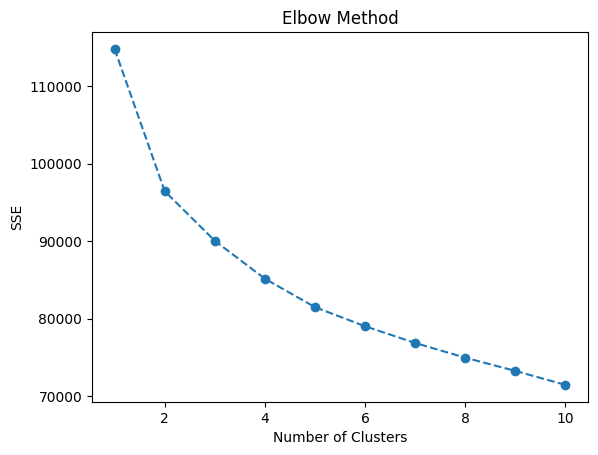

In [55]:
plt.plot(range(1,11),sse,marker = 'o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

In [56]:
#Here the optimal cluster is 4
Km = KMeans(n_clusters = 4, random_state = 42)
cluster = Km.fit_predict(df1_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
df1['Cluster'] = cluster

In [58]:
df1

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,AgeGroup,Cluster
UserID,,,,,,,,,,,,,,,,,,,,
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,0.000000,4.428571,4.00,0.000000,0.000000,4.285714,0.000000,3.666667,4.333333,3.666667,5.000000,0.000000,0,2
2,3.500000,3.736842,0.000000,0.000000,3.560000,3.583333,0.000000,3.898734,3.00,4.000000,3.000000,0.000000,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333,3,2
3,3.956522,4.000000,4.000000,4.000000,3.766667,0.000000,0.000000,4.000000,4.50,0.000000,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667,1,1
4,4.157895,3.833333,0.000000,4.000000,0.000000,5.000000,0.000000,4.166667,4.50,0.000000,4.333333,0.000000,0.000000,4.000000,3.555556,3.500000,3.333333,4.500000,3,2
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,0.00,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.00,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857,1,1
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.25,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000,3,3
6038,3.000000,4.000000,3.666667,3.000000,3.833333,0.000000,0.000000,3.888889,0.00,0.000000,2.500000,0.000000,0.000000,4.166667,4.000000,0.000000,4.000000,0.000000,3,0


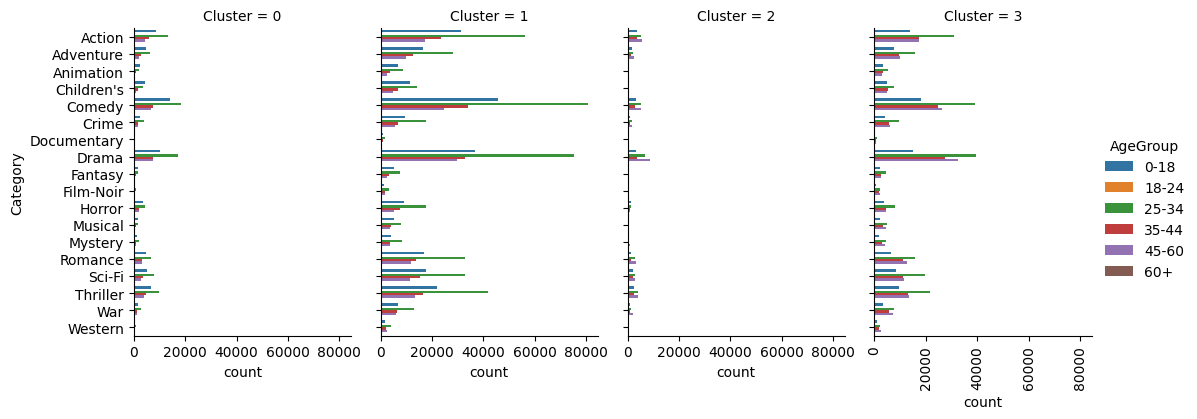

In [59]:
# Add the cluster labels to the exploded data for analysis
df2['Cluster'] = df1['Cluster'].reindex(df2['UserID']).values


# Group by cluster, occupation, and genre to analyze preferences
cluster_analysis = df2.groupby(['Cluster','Category','AgeGroup'])['Rating'].agg(['count']).reset_index()

# Plot the cluster analysis
sns.catplot(x='count', y='Category', hue='AgeGroup', col='Cluster', data=cluster_analysis, kind='bar', height=4, aspect=0.7)
plt.xticks(rotation=90)
plt.show()

In [60]:
cluster_analysis

,Cluster,Category,AgeGroup,count
0,0,Action,0-18,8467
1,0,Action,18-24,0
2,0,Action,25-34,13414
3,0,Action,35-44,5910
4,0,Action,45-60,4407
...,...,...,...,...
427,3,Western,18-24,0
428,3,Western,25-34,2120
429,3,Western,35-44,1744
430,3,Western,45-60,2460


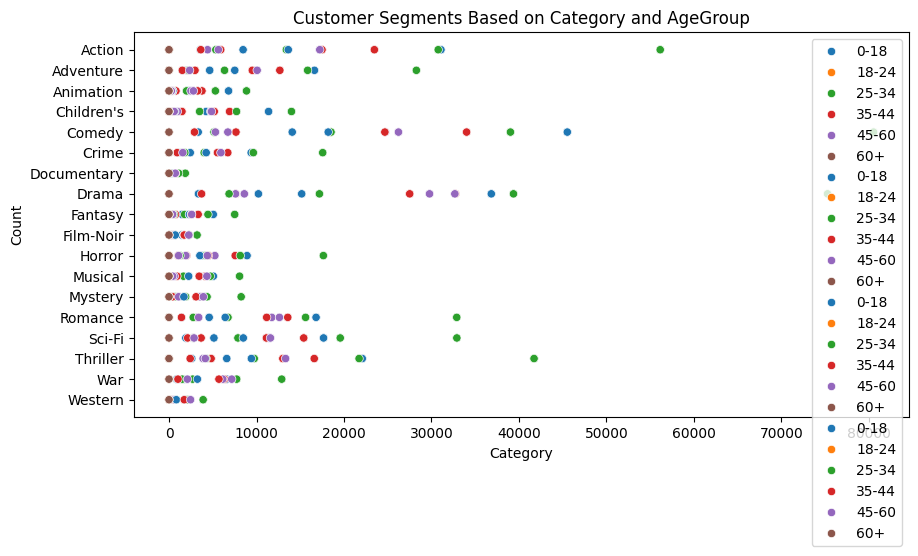

In [61]:
plt.figure(figsize=(10, 5))
for i in range(4):
    cluster_data = df2[df2['Cluster'] == i]
    sns.scatterplot(x = 'count', y = 'Category', data = cluster_analysis, hue = 'AgeGroup' )
plt.title('Customer Segments Based on Category and AgeGroup')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()
plt.show()


  v) Display year wise count of movies released.

In [62]:
def year_count_movies():
  d = df.groupby(['Year'])['MovieID'].count().reset_index(name = 'Count of Movies')
  return d

year_count_movies()

,Year,Count of Movies
0,1919,52
1,1920,24
2,1921,62
3,1922,238
4,1923,17
...,...,...
76,1996,129816
77,1997,150755
78,1998,147028
79,1999,155212


 vi) Display year wise, category wise count of movies released.

In [63]:
def year_category_movies():
  d = df.groupby(['Year','Category'])['MovieID'].count().reset_index(name = 'Count of Movies')
  return d

year_category_movies()

,Year,Category,Count of Movies
0,1919,Action,4
1,1919,Adventure,3
2,1919,Comedy,38
3,1919,Drama,7
4,1920,Comedy,24
...,...,...,...
893,2000,Mystery,577
894,2000,Romance,2136
895,2000,Sci-Fi,5605
896,2000,Thriller,10086


 vii) Use Clustering methods to segregate movie category and occupation of users. Display details. With the data, train the model and predict that when an occupation is entered, the model can predict the movie likings to that category of occupation.

In [64]:
df3 = df[['Category','AgeGroup','Occupation','Rating','UserID']]

In [65]:
print(df3)
df4 = df3.copy()

            Category AgeGroup                Occupation  Rating  UserID
0              Drama     0-18              K-12 Student       5       1
1              Drama    45-60             Self-Employed       5       2
2              Drama    25-34                Programmer       4      12
3              Drama    25-34  Executive and Managerial       4      15
4              Drama    45-60               Academician       5      17
...              ...      ...                       ...     ...     ...
1000206        Drama     0-18   Engineer and Technician       1    5780
1000207       Comedy     0-18                    Writer       5    5851
1000207        Drama     0-18                    Writer       5    5851
1000207      Western     0-18                    Writer       5    5851
1000208  Documentary    25-34               Academician       4    5938

[2101815 rows x 5 columns]


In [66]:
df4 = df3.pivot_table(index='UserID', columns='Category', values='Rating', aggfunc='mean').fillna(0)

In [67]:
df4 = df4.join(df3.groupby('UserID')['Occupation'].first(), how='left')

In [68]:
df4

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Occupation
UserID,,,,,,,,,,,,,,,,,,,
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,0.000000,4.428571,4.00,0.000000,0.000000,4.285714,0.000000,3.666667,4.333333,3.666667,5.000000,0.000000,K-12 Student
2,3.500000,3.736842,0.000000,0.000000,3.560000,3.583333,0.000000,3.898734,3.00,4.000000,3.000000,0.000000,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333,Self-Employed
3,3.956522,4.000000,4.000000,4.000000,3.766667,0.000000,0.000000,4.000000,4.50,0.000000,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667,Scientist
4,4.157895,3.833333,0.000000,4.000000,0.000000,5.000000,0.000000,4.166667,4.50,0.000000,4.333333,0.000000,0.000000,4.000000,3.555556,3.500000,3.333333,4.500000,Executive and Managerial
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,0.00,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000,Writer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.00,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857,Scientist
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.25,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000,Academician
6038,3.000000,4.000000,3.666667,3.000000,3.833333,0.000000,0.000000,3.888889,0.00,0.000000,2.500000,0.000000,0.000000,4.166667,4.000000,0.000000,4.000000,0.000000,Academician


In [69]:
encode_occ = LabelEncoder()
df4['Occupation'] = encode_occ.fit_transform(df4['Occupation'])

In [70]:
scaler = StandardScaler()
df4_scaled = scaler.fit_transform(df4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

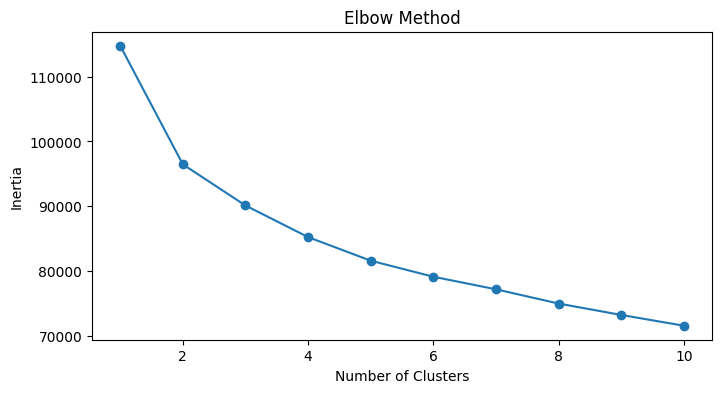

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(df4_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(df4_scaled)

# Add the cluster labels to the user-genre matrix
df4['Cluster'] = clusters


<ipython-input-72-c55003908e66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Cluster'] = df4['Cluster'].reindex(df3['UserID']).values


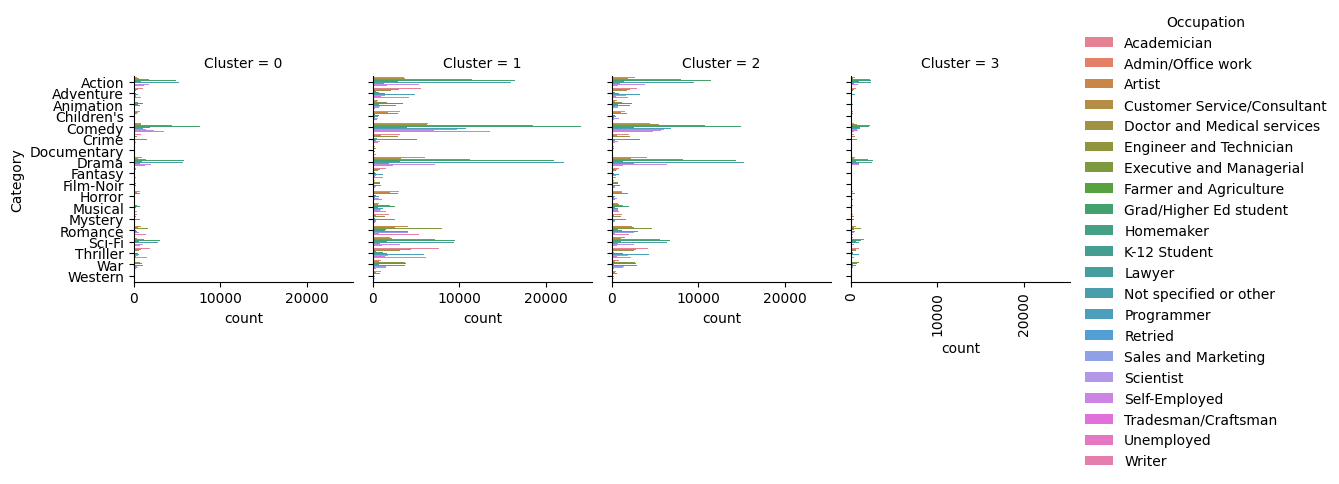

In [72]:
# Add the cluster labels to the exploded data for analysis
df3['Cluster'] = df4['Cluster'].reindex(df3['UserID']).values

# Group by cluster, occupation, and genre to analyze preferences
cluster_analysis1 = df3.groupby(['Cluster', 'Occupation', 'Category'])['Rating'].agg(['count', 'mean']).reset_index()

# Plot the cluster analysis
sns.catplot(x='count', y='Category', hue='Occupation', col='Cluster', data=cluster_analysis1, kind='bar', height=4, aspect=0.7)
plt.xticks(rotation=90)
plt.show()


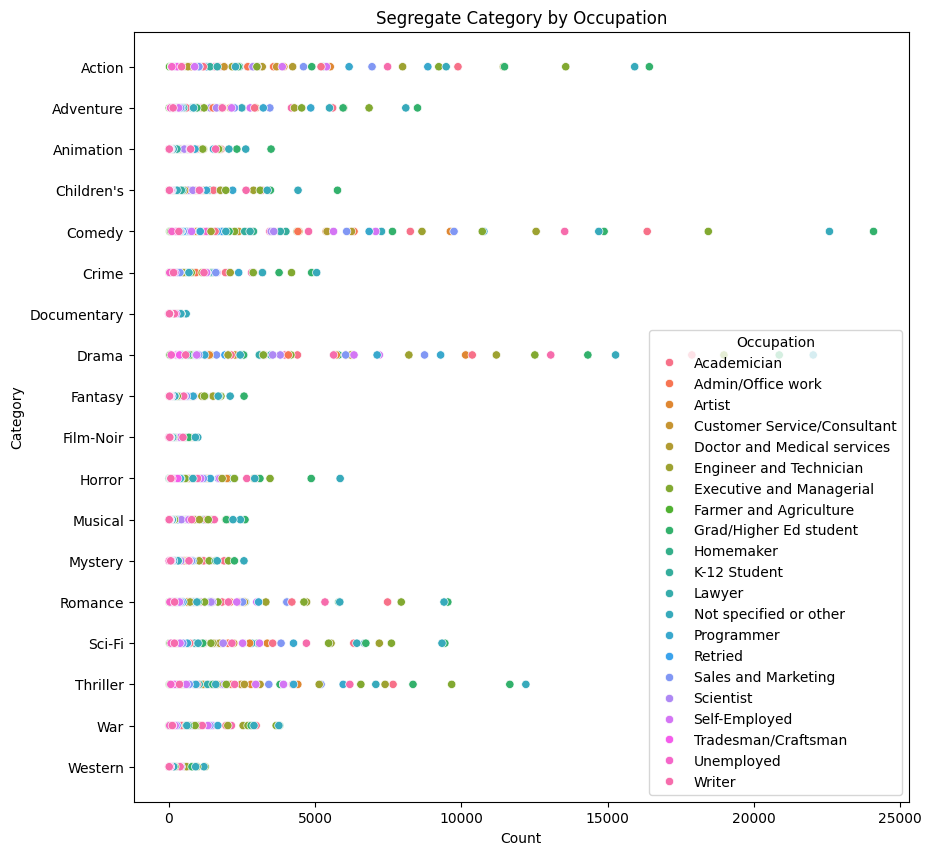

In [73]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='count', y='Category', hue='Occupation', data=cluster_analysis1)
plt.title('Segregate Category by Occupation')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

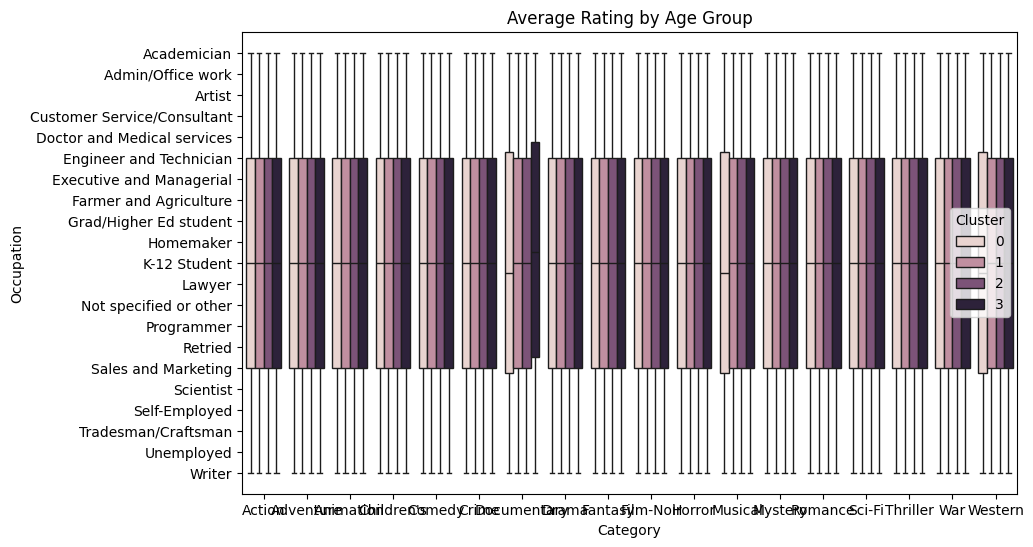

In [74]:
# Bar plot for AgeGroup and average Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Occupation',hue = 'Cluster', data=cluster_analysis1)
plt.title('Average Rating by Age Group')
plt.show()



In [75]:
encode_occ = LabelEncoder()
encode_cat = LabelEncoder()
df3['Occupation'] = encode_occ.fit_transform(df3['Occupation'])
df3['Category'] = encode_cat.fit_transform(df3['Category'])



<ipython-input-75-072ae6a82c6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Occupation'] = encode_occ.fit_transform(df3['Occupation'])
<ipython-input-75-072ae6a82c6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Category'] = encode_cat.fit_transform(df3['Category'])


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare the data for classification
X1 = df3['Occupation'].values.reshape(-1, 1)
y1 = df3['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

# Train a RandomForestClassifier
classifier1 = RandomForestClassifier(random_state=0)
classifier1.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier1.predict(X_test)



In [77]:
def predict_category(occupation):
    # Encode the input occupation
    occupation_encoded = encode_occ.transform([occupation]).reshape(-1, 1)

    # Predict the category
    category_encoded = classifier1.predict(occupation_encoded)

    # Decode the predicted category
    category = encode_cat.inverse_transform(category_encoded)

    return category[0]

# Example usage
occupation = input("Enter the occupation: ")
predicted_category = predict_category(occupation)
print(f"The predicted category for '{occupation}' is: {predicted_category}")

Enter the occupation: Artist
The predicted category for 'Artist' is: Drama


viii) Now include, the age group to the above model in addition to occupation of users to refine the predictive model.

In [78]:
encode_age = LabelEncoder()
df3['AgeGroup'] = encode_age.fit_transform(df3['AgeGroup'])

<ipython-input-78-665871dc85b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['AgeGroup'] = encode_age.fit_transform(df3['AgeGroup'])


In [79]:
# Prepare the data for classification
X = df3[['Occupation','AgeGroup']]
y = df3['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

In [80]:
def predict_category_1(occupation, age_group):
    # Encode the input occupation and age group
    occupation_encoded = encode_occ.transform([occupation])
    age_group_encoded = encode_age.transform([age_group])

    # Combine into a single input array
    input_data = [[occupation_encoded[0], age_group_encoded[0]]]

    # Predict the category
    category_encoded = classifier.predict(input_data)

    # Decode the predicted category
    category = encode_cat.inverse_transform(category_encoded)

    return category[0]

# Example
occupation1 = input("Enter the occupation: ")
age_group = input("Enter the age group: ")
predicted_category_1 = predict_category_1(occupation1 , age_group)
print(f"The predicted category for '{occupation1}' in '{age_group}' age group is: {predicted_category_1}")

Enter the occupation: Artist
Enter the age group: 0-18
The predicted category for 'Artist' in '0-18' age group is: Comedy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ix) Develop another model, where the search key should be category of movie, the answer should be the most likely age group of users and type of occupations associated. This model should be trained based on category of movies with age group and occupation who likes the most.

In [81]:
#New Dataframe for Developing another model
new_df = df[['Category','AgeGroup','Occupation', 'Rating', 'UserID']]

In [82]:
new_df

,Category,AgeGroup,Occupation,Rating,UserID
0,Drama,0-18,K-12 Student,5,1
1,Drama,45-60,Self-Employed,5,2
2,Drama,25-34,Programmer,4,12
3,Drama,25-34,Executive and Managerial,4,15
4,Drama,45-60,Academician,5,17
...,...,...,...,...,...
1000206,Drama,0-18,Engineer and Technician,1,5780
1000207,Comedy,0-18,Writer,5,5851
1000207,Drama,0-18,Writer,5,5851
1000207,Western,0-18,Writer,5,5851


In [83]:
new_df['Category'] = new_df['Category'].str.split('|')
new_df = new_df.explode('Category')

<ipython-input-83-f15a135391cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Category'] = new_df['Category'].str.split('|')


In [84]:
new_df

,Category,AgeGroup,Occupation,Rating,UserID
0,Drama,0-18,K-12 Student,5,1
1,Drama,45-60,Self-Employed,5,2
2,Drama,25-34,Programmer,4,12
3,Drama,25-34,Executive and Managerial,4,15
4,Drama,45-60,Academician,5,17
...,...,...,...,...,...
1000206,Drama,0-18,Engineer and Technician,1,5780
1000207,Comedy,0-18,Writer,5,5851
1000207,Drama,0-18,Writer,5,5851
1000207,Western,0-18,Writer,5,5851


In [85]:
new_df = pd.get_dummies(new_df , columns = ['Category','Occupation'])

In [86]:
new_df

,AgeGroup,Rating,UserID,Category_Action,Category_Adventure,Category_Animation,Category_Children's,Category_Comedy,Category_Crime,Category_Documentary,...,Occupation_Lawyer,Occupation_Not specified or other,Occupation_Programmer,Occupation_Retried,Occupation_Sales and Marketing,Occupation_Scientist,Occupation_Self-Employed,Occupation_Tradesman/Craftsman,Occupation_Unemployed,Occupation_Writer
0,0-18,5,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,45-60,5,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,25-34,4,12,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,25-34,4,15,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,45-60,5,17,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000206,0-18,1,5780,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000207,0-18,5,5851,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1000207,0-18,5,5851,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1000207,0-18,5,5851,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [87]:
from sklearn.metrics import accuracy_score
# Prepare the feature matrix X and target vectors y_age and y_occupation
X = new_df.drop(columns=['UserID', 'AgeGroup'])
y_age = new_df['AgeGroup']
y_occupation = new_df.filter(like='Occupation_').idxmax(axis=1)

# Split data into training and testing sets
X_train, X_test, y_age_train, y_age_test = train_test_split(X, y_age, test_size=0.2, random_state=42)
X_train, X_test, y_occ_train, y_occ_test = train_test_split(X, y_occupation, test_size=0.2, random_state=42)

# Train the age group model
age_model = RandomForestClassifier(n_estimators=100, random_state=42)
age_model.fit(X_train, y_age_train)

# Train the occupation model
occupation_model = RandomForestClassifier(n_estimators=100, random_state=42)
occupation_model.fit(X_train, y_occ_train)

# Predict on the test set
y_age_pred = age_model.predict(X_test)
y_occ_pred = occupation_model.predict(X_test)

# Calculate accuracy
age_accuracy = accuracy_score(y_age_test, y_age_pred)
occ_accuracy = accuracy_score(y_occ_test, y_occ_pred)

print(f'Age Group Prediction Accuracy: {age_accuracy}')
print(f'Occupation Prediction Accuracy: {occ_accuracy}')

Age Group Prediction Accuracy: 0.4919486253547529
Occupation Prediction Accuracy: 1.0


In [88]:
# Function to make predictions
def predict_category_info(category):
    # Create a DataFrame for the input category
    category_df = pd.DataFrame(columns=X.columns)
    for col in category_df.columns:
        category_df[col] = [0]

    # Set the appropriate category column to 1
    category_col = f'Category_{category}'
    if category_col in category_df.columns:
        category_df.at[0, category_col] = 1
    else:
        raise ValueError(f"Category '{category}' not found in training data")

    # Predict age group and occupation
    predicted_age_group = age_model.predict(category_df)[0]
    predicted_occupation = occupation_model.predict(category_df)[0]

    return predicted_age_group, predicted_occupation

# Example prediction
category = input("Enter the category: ")
predicted_age_group, predicted_occupation = predict_category_info(category)
print(f"For the category '{category}', the most likely age group is '{predicted_age_group}' and the occupation is '{predicted_occupation.split('_')[1]}'")

Enter the category: Action
For the category 'Action', the most likely age group is '25-34' and the occupation is 'Farmer and Agriculture'


In [89]:
#Creating a functional system for Movie Data Analytics

In [95]:
while True:
  print('\n\tWelcome to Movies Data Analytics \n ')
  print('1. Total number of movies released in each year.')
  print('2. Find the movie category having highest ratings in each year.')
  print('3. Find and display movie category and age group wise likings.')
  print('4. Use Cluster models to segregate movie category and age group wise likings')
  print('5. Display year wise count of movies released.')
  print('6. Display year wise, category wise count of movies released.')
  print('7. Model Prediction for Category.')
  print('8. Model Prediction for Category on the basis of AgeGroup and Occupation')
  print('9. Model Prediction for Occupation and AgeGroup ')
  print('10. Exit\n')
  n = int(input('Enter your choice: '))


  if n==1:
    print(total_num_movies())
  elif n==2:
    print(high_rating_movies())
  elif n==3:
    print(movie_age_liking())
  elif n==4:
    print(cluster_analysis)
  elif n==5:
    print(year_count_movies())
  elif n==6:
    print(year_category_movies())
  elif n==7:
    occupation = input("Enter the occupation: ")
    predicted_category = predict_category(occupation)
    print(f"The predicted category for '{occupation}' is: {predicted_category}")
  elif n==8:
    occupation1 = input("Enter the occupation: ")
    age_group = input("Enter the age group: ")
    predicted_category_1 = predict_category_1(occupation1 , age_group)
    print(f"The predicted category for '{occupation1}' in '{age_group}' age group is: {predicted_category_1}")
  elif n==9:
    category = input("Enter the category: ")
    predicted_age_group, predicted_occupation = predict_category_info(category)
    print(f"For the category '{category}', the most likely age group is '{predicted_age_group}' and the occupation is '{predicted_occupation.split('_')[1]}'")
  elif n==10:
    print('Thank you for using Movies Data Analytics')
    break
  else:
    print('Invalid choice')



	Welcome to Movies Data Analytics 
 
1. Total number of movies released in each year.
2. Find the movie category having highest ratings in each year.
3. Find and display movie category and age group wise likings.
4. Use Cluster models to segregate movie category and age group wise likings
5. Display year wise count of movies released.
6. Display year wise, category wise count of movies released.
7. Model Prediction for Category.
8. Model Prediction for Category on the basis of AgeGroup and Occupation
9. Model Prediction for Occupation and AgeGroup 
10. Exit

Enter your choice: 1
    Year  Movies_Count
0   1919            52
1   1920            24
2   1921            62
3   1922           238
4   1923            17
..   ...           ...
76  1996        129816
77  1997        150755
78  1998        147028
79  1999        155212
80  2000         73706

[81 rows x 2 columns]

	Welcome to Movies Data Analytics 
 
1. Total number of movies released in each year.
2. Find the movie category 